In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
from utils import *

In [2]:
%config InlineBackend.figure_format='retina'

In [3]:
def run_one_step(seed=None):
    if seed is not None:
        np.random.seed(seed)
    chng_bm_list = []
    chng_gs_list = []
    for p_soph in p_s:
        sch_cap = np.random.multinomial(n_std, np.ones(n_sch)/n_sch)
        pref_std, pref_sch = get_pref(n_std, n_sch)

        idx_soph, idx_sin = split_std(n_std, p_soph)
        pref_new = alter_func(pref_std, idx_soph)
        
        match_bm1 = boston_mechanism(pref_std, pref_sch, sch_cap)
        match_bm2 = boston_mechanism(pref_new, pref_sch, sch_cap)
        ch_bm1 = std_admit_choice(match_bm1, pref_std)[idx_soph]
        ch_bm2 = std_admit_choice(match_bm2, pref_new)[idx_soph]
        change_bm = compare_func(ch_bm1, ch_bm2)
        chng_bm_list.append(change_bm)

        match_gs1 = gale_shapley(pref_std, pref_sch, sch_cap)
        match_gs2 = gale_shapley(pref_new, pref_sch, sch_cap)
        ch_gs1 = std_admit_choice(match_gs1, pref_std)[idx_soph]
        ch_gs2 = std_admit_choice(match_gs2, pref_new)[idx_soph]
        change_gs = compare_func(ch_gs1, ch_gs2)
        chng_gs_list.append(change_gs)

    return chng_bm_list, chng_gs_list

def run_one_step2(seed=None):
    if seed is not None:
        np.random.seed(seed)
    chng_bm_list = []
    chng_gs_list = []
    for p_soph in p_s:
        sch_cap = np.random.multinomial(n_std, np.ones(n_sch)/n_sch)
        pref_std, pref_sch = get_pref(n_std, n_sch)

        idx_soph, idx_sin = split_std(n_std, p_soph)
        pref_new, unpop = alter_pref3(pref_std, idx_soph)

        match_bm2 = boston_mechanism(pref_new, pref_sch, sch_cap)
        change_bm = admit_to_unpop(match_bm2, idx_soph, unpop)
        chng_bm_list.append(change_bm)

        match_gs2 = gale_shapley(pref_new, pref_sch, sch_cap)
        change_gs = admit_to_unpop(match_gs2, idx_soph, unpop)
        chng_gs_list.append(change_gs)

    return chng_bm_list, chng_gs_list

In [4]:
np.random.seed(48)

n_std = 2000
n_sch = 20
n_sim = 1
p_s = np.arange(1,11)/10

alter_func, compare_func = alter_pref, admit_to_higher

bmx = []
gsx = []
for i in trange(n_sim):
    chng_bm_list, chng_gs_list = run_one_step(seed=i)
    bmx.append(chng_bm_list)
    gsx.append(chng_gs_list)

100%|██████████| 10/10 [06:02<00:00, 36.26s/it]


In [5]:
n_soph = (p_s*n_std).astype(int)
avgstd_bm = np.mean(bmx, axis=0)/n_soph
avgstd_gs = np.mean(gsx, axis=0)/n_soph
stdev_bm = np.std(bmx, axis=0)/n_soph
stdev_gs = np.std(gsx, axis=0)/n_soph

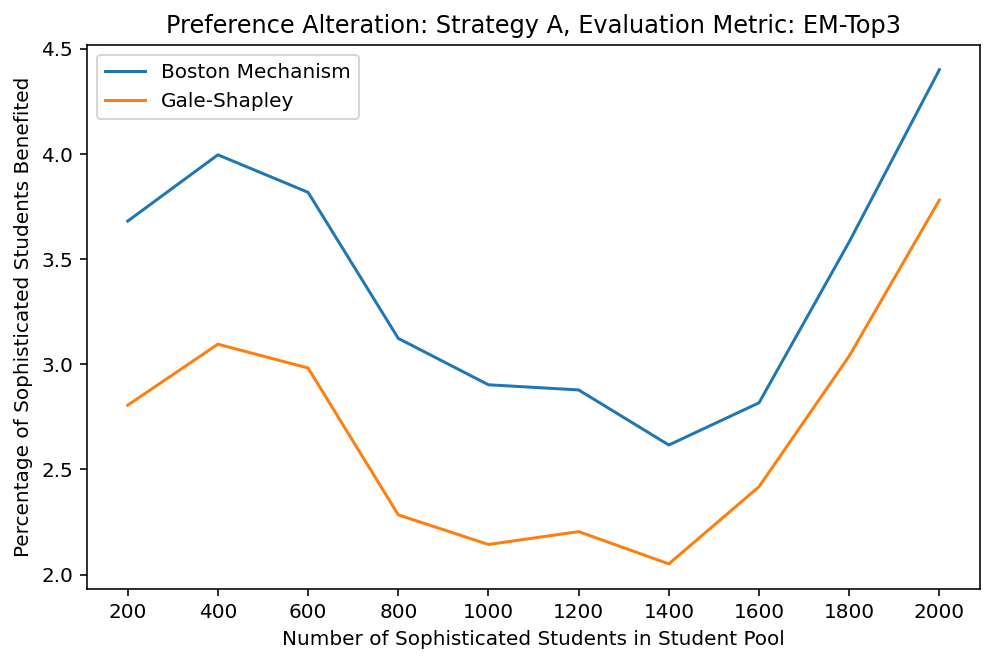

In [6]:
n_std = 2000
n_sch = 20
n_sim = 100
p_s = np.arange(1,11)/10

n_soph = (p_s*n_std).astype(int)

stgy = 'Strategy A'
eval_m = 'EM-Top3'
avgstd_bm = np.array([0.0368    , 0.03995   , 0.03816667, 0.031225  , 0.02902   ,
        0.028775  , 0.02615714, 0.0281625 , 0.03581111, 0.043995  ])
avgstd_gs = np.array([0.02805   , 0.03095   , 0.02981667, 0.0228375 , 0.02143   ,
        0.02204167, 0.02050714, 0.024175  , 0.03038333, 0.0378    ])

# stgy = 'Strategy A'
# eval_m = 'EM-Higher'
# avgstd_bm = np.array([0.0555    , 0.060025  , 0.0585    , 0.0489875 , 0.04676   ,
#         0.04814167, 0.04533571, 0.04668125, 0.05215556, 0.06216   ]),
# avgstd_gs = np.array([0.0461    , 0.05005   , 0.04853333, 0.040075  , 0.03853   ,
#         0.04015   , 0.03895   , 0.0428375 , 0.04747222, 0.05565   ])

# stgy = 'Strategy B'
# eval_m = 'EM-Top3'
# avgstd_bm = np.array([0.0781    , 0.077125  , 0.06708333, 0.065825  , 0.05302   ,
#         0.05163333, 0.04413571, 0.04379375, 0.04173333, 0.05324   ])
# avgstd_gs = np.array([0.0641    , 0.0644    , 0.05741667, 0.0562625 , 0.04417   ,
#         0.043525  , 0.03592143, 0.03668125, 0.03851111, 0.04727   ])

# stgy = 'Strategy B'
# eval_m = 'EM-Higher'
# avgstd_bm = np.array([0.1166    , 0.11965   , 0.10583333, 0.106525  , 0.09089   ,
#         0.090775  , 0.08262857, 0.08059375, 0.07280556, 0.081215  ])
# avgstd_gs = np.array([0.097     , 0.101925  , 0.09193333, 0.0913125 , 0.07708   ,
#         0.0787    , 0.0697    , 0.06890625, 0.06756667, 0.075305  ])


# stgy = 'Strategy C'
# eval_m = 'EM-Selected'
# avgstd_bm = np.array([0.19925   , 0.171275  , 0.14333333, 0.1145    , 0.09279   ,
#         0.07915833, 0.06970714, 0.06128125, 0.05520556, 0.050995  ])
# avgstd_gs = np.array([0.1843    , 0.161175  , 0.14058333, 0.11385   , 0.09271   ,
#         0.07915833, 0.06970714, 0.06128125, 0.05520556, 0.050995  ])


plt.figure(figsize=(8, 5))
plt.plot(n_soph, avgstd_bm*100, label='Boston Mechanism', color='tab:blue')
plt.plot(n_soph, avgstd_gs*100, label='Gale-Shapley', color='tab:orange')

plt.xlabel('Number of Sophisticated Students in Student Pool')
plt.ylabel('Percentage of Sophisticated Students Benefited')
plt.xticks(n_soph)
plt.title(f'Preference Alteration: {stgy}, Evaluation Metric: {eval_m}')
plt.legend()
plt.show()
